In [1]:
testname="mandelbrot"

In [2]:
import pandas as pd
import numpy as np
import json
def convert(x,y,z):
    name = x+str(y)
    temp = pd.DataFrame(z)
    temp.rename(columns = {'duration':name+'duration', 'billed':name+'billed', 'memoryUsed':name+'memory_used'},inplace = True)
    temp["id"]=tuple(range(1, 101, 1))
    return temp
original = pd.read_json('../results/'+testname+'.json')
result = [convert(x, y,z) for x, y,z in zip(original['architecture'], original['memory'],original['testResult'])]
dfs = [df.set_index('id') for df in result]
converted = pd.concat(dfs,axis=1)
converted

,ARM1024duration,ARM1024billed,ARM1024memory_used,ARM2048duration,ARM2048billed,ARM2048memory_used,ARM512duration,ARM512billed,ARM512memory_used,x861024duration,x861024billed,x861024memory_used,x862048duration,x862048billed,x862048memory_used,x86512duration,x86512billed,x86512memory_used
id,,,,,,,,,,,,,,,,,,
1,771.02,772,85,462.43,463,85,1554.75,1555,85,635.35,636,87,310.73,311,87,1258.78,1259,87
2,754.58,755,92,441.79,442,93,1560.18,1561,93,611.40,612,95,313.83,314,95,1241.01,1242,96
3,761.00,762,101,443.25,444,101,1505.05,1506,93,649.36,650,104,307.20,308,104,1173.52,1174,96
4,734.97,735,101,433.89,434,101,1539.60,1540,93,593.66,594,104,294.61,295,104,1210.07,1211,96
5,755.18,756,101,437.29,438,101,1502.21,1503,93,612.44,613,104,301.86,302,104,1168.82,1169,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,739.53,740,101,435.64,436,101,1480.93,1481,93,592.18,593,104,296.14,297,104,1178.42,1179,96
97,757.07,758,101,433.97,434,101,1485.70,1486,93,596.33,597,104,300.65,301,104,1173.90,1174,96
98,735.03,736,101,433.27,434,101,1502.99,1503,93,613.27,614,104,294.04,295,104,1173.75,1174,96


In [6]:
durations = converted.filter(regex="duration", axis=1)
durations.mean()


ARM1024duration     746.7372
ARM2048duration     435.1610
ARM512duration     1513.0602
x861024duration     599.0316
x862048duration     295.8264
x86512duration     1190.9164
dtype: float64

<AxesSubplot:xlabel='id'>

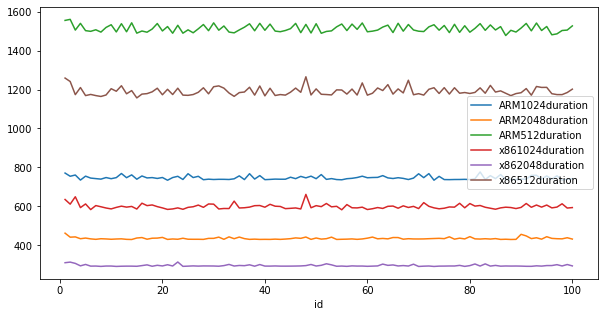

In [12]:
durations.plot(figsize=(10,5))

In [11]:
durations.std()

ARM1024duration     9.818871
ARM2048duration     5.428726
ARM512duration     18.911535
x861024duration    12.731248
x862048duration     4.618133
x86512duration     21.232432
dtype: float64

In [4]:
armDuration = durations["ARM2048duration"]
x86Duration = durations["x862048duration"]

series = np.array([1000000,10000000,20000000,30000000,40000000,50000000])
create_two_series = lambda x : np.array([x*580*0.0000000267, x*445*0.0000000333,x*1024*0.0000000133,x*1106*0.0000000167]).reshape(-1,1)
cost = np.array(list(map(create_two_series,series))).reshape(-1,4)
cost


array([[ 15.486 ,  14.8185,  13.6192,  18.4702],
       [154.86  , 148.185 , 136.192 , 184.702 ],
       [309.72  , 296.37  , 272.384 , 369.404 ],
       [464.58  , 444.555 , 408.576 , 554.106 ],
       [619.44  , 592.74  , 544.768 , 738.808 ],
       [774.3   , 740.925 , 680.96  , 923.51  ]])

In [5]:
tostr = lambda x : str(x)
costdf = pd.DataFrame(cost,columns=['ARM-2048','x86-2048','ARM-1024','x86-1024'],index=list(map(tostr,series)))
costdf

,ARM-2048,x86-2048,ARM-1024,x86-1024
1000000,15.486,14.8185,13.6192,18.4702
10000000,154.860,148.1850,136.1920,184.7020
20000000,309.720,296.3700,272.3840,369.4040
30000000,464.580,444.5550,408.5760,554.1060
40000000,619.440,592.7400,544.7680,738.8080
50000000,774.300,740.9250,680.9600,923.5100
